In [1]:
import pickle
from sklearn.model_selection import train_test_split
import imageio
import scipy.misc
import numpy as np
import os
import keras
from PIL import Image
import cv2



Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install scipy==1.1.0

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4377534930492992998, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1553290703198095832
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12279618361685279643
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 145119616028205629
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
from zipfile import ZipFile
filename ="/content/drive/My Drive/Image_Classification/dataset_image.zip"
with ZipFile (filename, 'r') as zip:
    zip.extractall()

# New Section

In [0]:
# Loading dataset
def load_datasets():
    
    X=[]
    y=[]
    for image_label in label:
        images = os.listdir("/content/dataset_image/"+image_label)
        for image in images:
            img = scipy.misc.imread("/content/dataset_image/"+image_label+"/"+image)
            img = scipy.misc.imresize(img, (224, 224))
            X.append(img)
            y.append(label.index(image_label))


 
    X=np.array(X)
    #X_expanded_dims = np.expand_dims(X, axis=0)
    #X = keras.applications.mobilenet.preprocess_input(X_expanded_dims)
    y=np.array(y)
    return X,y


In [0]:
# Save int2word dict
label = os.listdir("/content/dataset_image")
save_label = open("/content/drive/My Drive/Image_Classification/int_to_word_out.pickle","wb")
pickle.dump(label, save_label)
save_label.close()

In [8]:
label

['FrenchFries', 'Fried_Rice', 'Samosa', 'Pizza', 'Ice_cream', 'Burger']

In [0]:
import numpy
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input
from keras.preprocessing.image import ImageDataGenerator

In [0]:
K.common.set_image_dim_ordering('tf')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [0]:
def pre_process(X):

    # normalize inputs from 0-255 to 0.0-1.0

    X = X.astype('float32')
    X = X / 255.0

    return X

In [0]:
def one_hot_encode(y):

    # one hot encode outputs
    y = np_utils.to_categorical(y)
    num_classes = y.shape[1]
    return y,num_classes

In [13]:
# load data
X,y=load_datasets()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [0]:
# pre process
X=pre_process(X)

In [0]:
#one hot encode
y,num_classes=one_hot_encode(y)

In [0]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [0]:
aug = ImageDataGenerator(
                         rotation_range=20,
                         zoom_range=0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.15,
                         horizontal_flip=True,
                         fill_mode="nearest")

epochs = 25

In [18]:
base_model = keras.applications.vgg16.VGG16(input_tensor= Input(shape=(224, 224,3)),weights='imagenet', include_top=False)    

58892288/58889256 [==============================] - 2s 0us/step


In [19]:
print(base_model.summary())


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
print(base_model.summary())


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
 # Add the fully-connected layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu', name='fc2')(x)
predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

# Create your own model
model = Model(inputs=base_model.input, outputs=predictions)


In [22]:
for i,layer in enumerate(model.layers):
  print("{}: {}".format(i,layer))

0: <keras.engine.input_layer.InputLayer object at 0x7f6a34bb4940>
1: <keras.layers.convolutional.Conv2D object at 0x7f6a34bb4e10>
2: <keras.layers.convolutional.Conv2D object at 0x7f6a34bb4fd0>
3: <keras.layers.pooling.MaxPooling2D object at 0x7f6a34b93550>
4: <keras.layers.convolutional.Conv2D object at 0x7f6a34b93470>
5: <keras.layers.convolutional.Conv2D object at 0x7f6a34b4b438>
6: <keras.layers.pooling.MaxPooling2D object at 0x7f6a34b4be10>
7: <keras.layers.convolutional.Conv2D object at 0x7f6a34b4bdd8>
8: <keras.layers.convolutional.Conv2D object at 0x7f6a34b51b38>
9: <keras.layers.convolutional.Conv2D object at 0x7f6a34b3f6d8>
10: <keras.layers.pooling.MaxPooling2D object at 0x7f6a34b3fef0>
11: <keras.layers.convolutional.Conv2D object at 0x7f6a34b3ffd0>
12: <keras.layers.convolutional.Conv2D object at 0x7f6a34b6cc88>
13: <keras.layers.convolutional.Conv2D object at 0x7f6a34b71828>
14: <keras.layers.pooling.MaxPooling2D object at 0x7f6a34b752b0>
15: <keras.layers.convolutional.C

In [23]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
for layer in model.layers[:19]:
    layer.trainable=False
for layer in model.layers[19:]:
    layer.trainable=True

In [25]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model.compile(Adam(lr=0.0001),loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
history=model.fit_generator(
    aug.flow(X_train,y_train,batch_size=32),
    validation_data=(X_test,y_test),
    steps_per_epoch=len(X_train)/32,
    epochs=epochs)


Epoch 1/25
193/192 [==============================] - 73s 376ms/step - loss: 1.1055 - accuracy: 0.5836 - val_loss: 0.7545 - val_accuracy: 0.7319
Epoch 2/25
193/192 [==============================] - 65s 338ms/step - loss: 0.8277 - accuracy: 0.6983 - val_loss: 0.6596 - val_accuracy: 0.7766
Epoch 3/25
193/192 [==============================] - 65s 339ms/step - loss: 0.7454 - accuracy: 0.7399 - val_loss: 0.6496 - val_accuracy: 0.7688
Epoch 4/25
193/192 [==============================] - 66s 342ms/step - loss: 0.7039 - accuracy: 0.7501 - val_loss: 0.6211 - val_accuracy: 0.7921
Epoch 5/25
193/192 [==============================] - 66s 340ms/step - loss: 0.6614 - accuracy: 0.7681 - val_loss: 0.5815 - val_accuracy: 0.8057
Epoch 6/25
193/192 [==============================] - 66s 340ms/step - loss: 0.6462 - accuracy: 0.7721 - val_loss: 0.5768 - val_accuracy: 0.8076
Epoch 7/25
193/192 [==============================] - 65s 338ms/step - loss: 0.6089 - accuracy: 0.7898 - val_loss: 0.5641 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


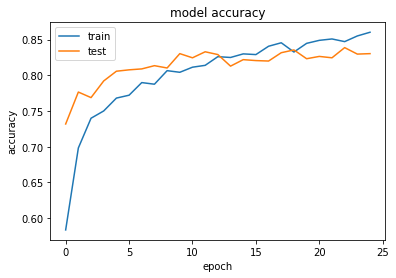

In [28]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

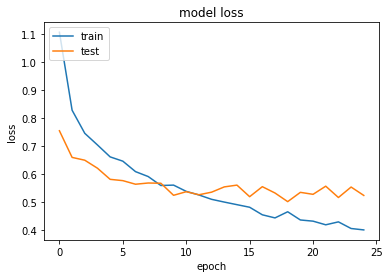

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [30]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 83.03%


In [31]:
# serialize model to JSONx
model_json = model.to_json()
with open("/content/drive/My Drive/Image_Classification/models/new_VGG16_model_face.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Image_Classification/models/new_VGG16_model_face.h5")
print("Saved model to disk")

Saved model to disk
